In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Datasets 

In [2]:
dataset = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\Datasets\Bank+Customer+Churn\Bank_Churn_Data_Dictionary.csv")
dataset2 = pd.read_excel(r"C:\Users\ADMIN\OneDrive\Documents\Datasets\Bank+Customer+Churn\Bank_Churn_Messy.xlsx", sheet_name=None)
dataset3 = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\Datasets\Bank+Customer+Churn\Bank_Churn.csv")

In [3]:
# Extracting the sheets from the excel file

Customer_info = dataset2['Customer_Info']
Account_info = dataset2['Account_Info']

# Merging them into one DataFrame
merged_df = pd.merge(Customer_info, Account_info, on = 'CustomerId', how = 'inner')


## Data Cleaning


In [4]:
# Dropping unnecessary columns
merged_df.drop(columns = ['Tenure_x'], inplace = True)
merged_df.rename(columns = {'Tenure_y': 'Tenure'}, inplace = True)

In [5]:
merged_df.duplicated() # checking for duplicates
merged_df[merged_df.duplicated(keep=False)] 

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,€101348.88,€0.0,1,Yes,2,Yes,1
10000,15628319,Walker,792,French,Female,28.0,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,€38190.78,€130142.79,1,No,4,No,0


In [6]:
merged_df.drop_duplicates(inplace = True) # dropping duplicates

In [7]:
merged_df.reset_index(drop=True, inplace=True) # resetting the index

In [8]:
# Getting the first three indices of NaN values in the 'Surname' column
nan_indices = merged_df[merged_df['Surname'].isna()].index[:3]

replacements = ['McWilliams', 'Lombardo', 'Kennedy']

# Replacing the NaN values with the replacements
merged_df.loc[nan_indices, 'Surname'] = replacements

In [9]:
# Getting the first three indices of NaN values in the 'Age' column
nan_indices = merged_df[merged_df['Age'].isna()].index[:3]

# Creating a list of replacements for the NaN values
replacements = [43,39,32]

# Replacing the NaN values with the replacements
merged_df.loc[nan_indices, 'Age'] = replacements

In [21]:
# Getting the first three indices of values in the 'EstimatedSalary' column
indices = merged_df[merged_df['EstimatedSalary'] == -999999.00].index[:3]

# Creating a list of replacements for the NaN values
replacements = [67859.00,123985.38,32230.09]

# Replacing the NaN values with the replacements
merged_df.loc[indices, 'EstimatedSalary'] = replacements

In [13]:
merged_df['Surname'] = merged_df['Surname'].str.strip() # stripping the Surname column

In [14]:
# replacing the values in the Geography column
merged_df['Geography'] = merged_df['Geography'].replace({'FRA': 'France','French': 'France'})  

In [15]:
merged_df['Age'] = merged_df['Age'].astype(int) # converting the Age column to int

In [16]:
# replacing the €
merged_df['EstimatedSalary'] = merged_df['EstimatedSalary'].str.replace('€', '')
merged_df['Balance'] = merged_df['Balance'].str.replace('€', '') 

In [17]:
merged_df['Balance'] = merged_df['Balance'].astype(float) # converting the Balance column to float
merged_df['EstimatedSalary'] = merged_df['EstimatedSalary'].astype(float) # converting the EstimatedSalary column to float

In [18]:
# converting the HasCrCard column to int
merged_df['HasCrCard'] = merged_df['HasCrCard'].map({'Yes' : 1, 'No': 0}).astype(int)  

In [19]:
# converting the IsActiveMember column to int
merged_df['IsActiveMember'] = merged_df['IsActiveMember'].map({'Yes' : 1, 'No': 0}).astype(int)  

In [ ]:
# Cleaned Data
merged_df.to_csv('cleaned_bank_customer.csv')


# Exploratory Data Analysis

In [55]:
# Percentage of churn by gender where 1 = exited and 0 = not exited
pd.crosstab(merged_df['Gender'], merged_df['Exited'], margins=True, normalize= 'index') * 100

Exited,0,1
Gender,,
Female,74.928461,25.071539
Male,83.544072,16.455928
All,79.630000,20.370000


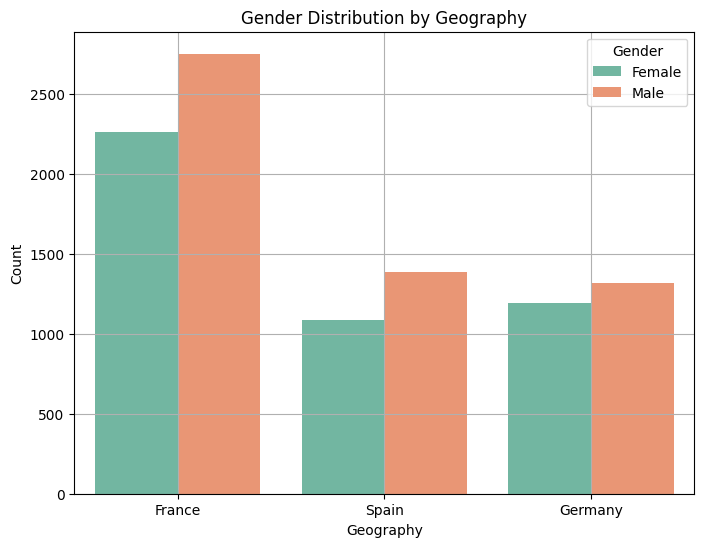

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df, x='Geography', hue='Gender', palette='Set2')
plt.title("Gender Distribution by Geography")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.grid(True)
plt.show()

In [56]:
pd.crosstab(merged_df['Geography'], merged_df['Gender'], margins=True, normalize= 'index') * 100


Gender,Female,Male
Geography,,
France,45.093738,54.906262
Germany,47.548824,52.451176
Spain,43.964473,56.035527
All,45.430000,54.570000


In [54]:
# Percentage of churn by geography where 1 = not exited and 0 = exited
pd.crosstab(merged_df['Geography'], merged_df['Exited'], margins=True, normalize= 'index') * 100

Exited,0,1
Geography,,
France,83.845233,16.154767
Germany,67.556796,32.443204
Spain,83.326605,16.673395
All,79.630000,20.370000


In [ ]:
pd.crosstab(merged_df['IsActiveMember'], merged_df['Exited'], margins=True, normalize= 'index') * 100

Exited,0,1
IsActiveMember,,
0,73.149103,26.850897
1,85.730926,14.269074
All,79.630000,20.370000


In [ ]:
# distribution of Ages
plt.figure(figsize=(8, 6))
sns.histplot(data = merged_df, x = 'Age', kde = True, bins = 30)
plt.title('Distribution of Age')
plt.axvline(merged_df['Age'].mean(), color='red', linestyle='--', label='Mean Age')
plt.axvline(merged_df['Age'].median(), color='green', linestyle='--', label='Median Age')
plt.legend()
plt.show()


In [ ]:
# outliers in the Age column
Q1 = 32
Q3 = 44
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = merged_df[(merged_df['Age'] < lower_bound) | (merged_df['Age'] > upper_bound)]
print(f"{len(outliers)} outliers ({len(outliers)/10000:.1%})")

In [ ]:
# distribution of Balance
plt.figure(figsize=(8, 6))
sns.histplot(data = merged_df, x = 'Balance', kde = True, bins = 50, log_scale=True, color='yellow')
plt.axvline(merged_df['Balance'].mean(), color='red', linestyle='--', label='Mean Balance')
plt.axvline(merged_df['Balance'].median(), color='green', linestyle='--', label='Median Balance')
plt.title('Distribution of Balance')
plt.legend()

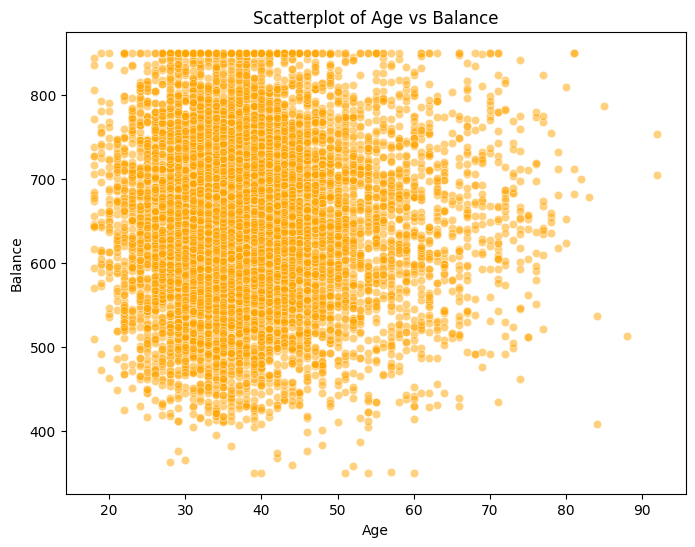

In [78]:
# relationship between Age and Balance
plt.figure(figsize=(8, 6))
sns.scatterplot(data = merged_df, x = 'Age', y = 'CreditScore', alpha = 0.5, color = 'orange')
plt.title('Scatterplot of Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()


In [39]:
# correlation between Age and Balance
correlation = merged_df['Age'].corr(merged_df['Balance'], method= 'pearson')
print(f"The correlation between Age and Balance is {correlation:.2f}")

The correlation between Age and Balance is 0.03


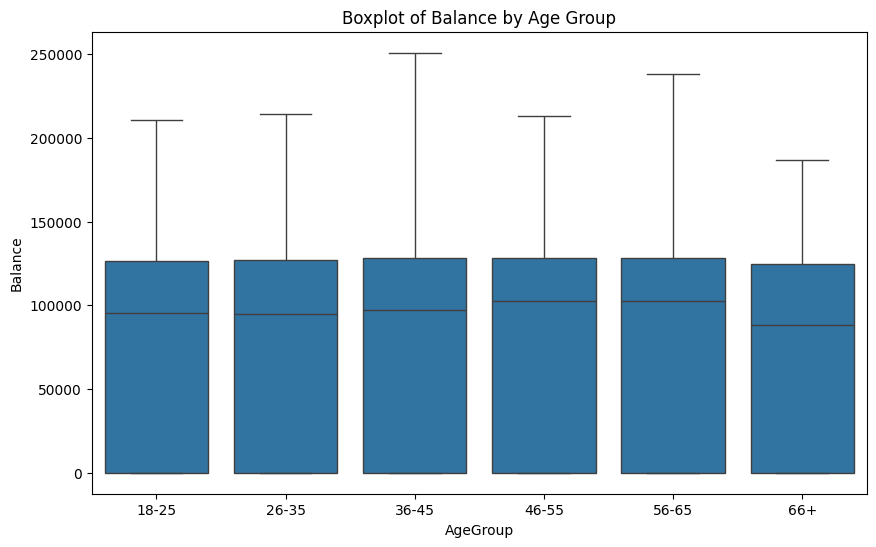

In [35]:
# balance distribution by Age group
merged_df['AgeGroup'] = pd.cut(merged_df['Age'], bins=[18, 25, 35, 45, 55, 65, 100], 
                               labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])

plt.figure(figsize=(10, 6))
sns.boxplot(x = 'AgeGroup', y = 'Balance', data = merged_df)
plt.title('Boxplot of Balance by Age Group')
plt.show()

In [40]:
# correlation between Age and EstimatedSalary
correlation = merged_df['Age'].corr(merged_df['EstimatedSalary'], method= 'pearson')
print(f"The correlation between Age and EstimatedSalary is {correlation:.2f}")     

The correlation between Age and EstimatedSalary is -0.01


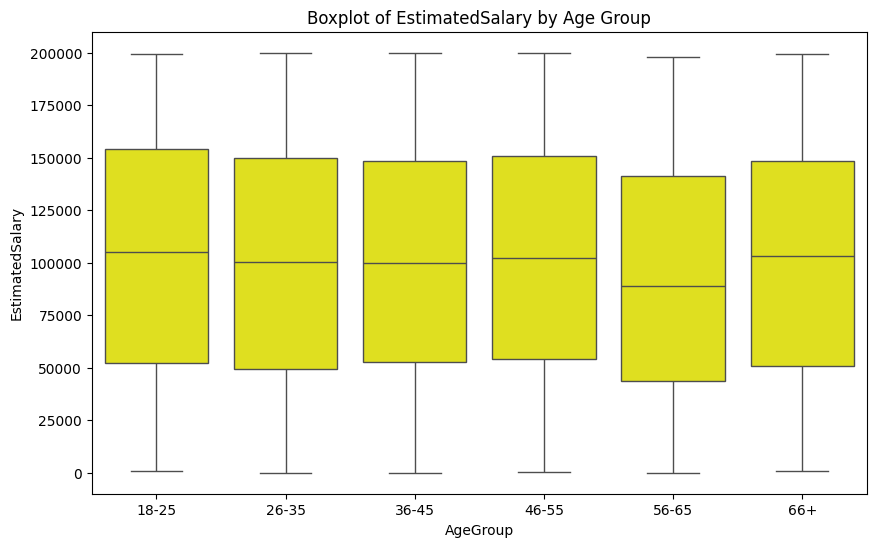

In [44]:
# estimatedsalary distribution by Age group
merged_df['AgeGroup'] = pd.cut(merged_df['Age'], bins=[18, 25, 35, 45, 55, 65, 100], 
                               labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])

plt.figure(figsize=(10, 6))
sns.boxplot(x = 'AgeGroup', y = 'EstimatedSalary', data = merged_df, color='yellow')
plt.title('Boxplot of EstimatedSalary by Age Group')
plt.show()

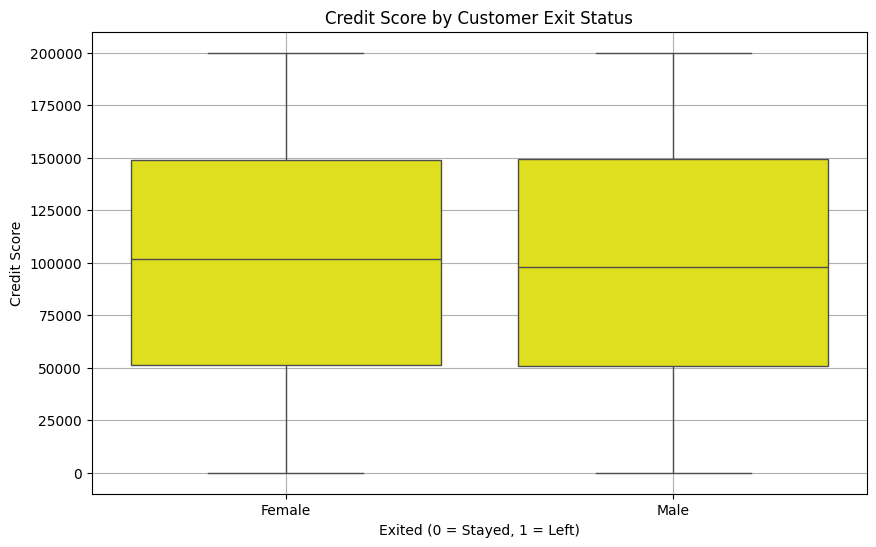

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(y = 'EstimatedSalary', x = 'Gender', data = merged_df, color='yellow')
plt.title("Credit Score by Customer Exit Status")
plt.xlabel("Exited (0 = Stayed, 1 = Left)")
plt.ylabel("Credit Score")
plt.grid(True)
plt.show()

In [77]:
merged_df.groupby('Gender')['EstimatedSalary'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,4543.0,100583.881492,57381.252874,91.75,51181.615,101905.34,148963.12,199992.48
Male,5457.0,99668.948276,57629.070461,11.58,50906.650,98060.51,149503.54,199953.33


<Axes: >

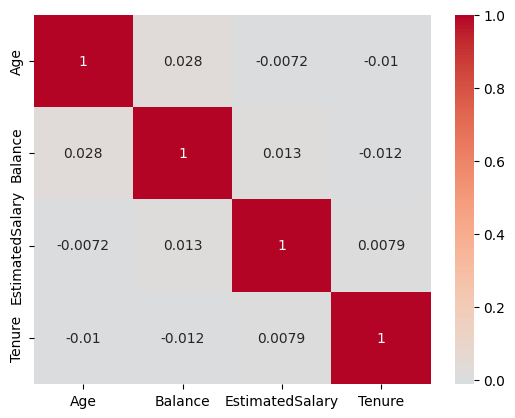

In [81]:
correlation_matrix = merged_df[['Age', 'Balance', 'EstimatedSalary', 'Tenure']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

In [20]:
merged_df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42,101348.88,0.00,1,1,2,1,1
1,15647311,Hill,608,Spain,Female,41,112542.58,83807.86,1,1,1,1,0
2,15619304,Onio,502,France,Female,42,113931.57,159660.80,3,0,8,0,1


# 🔍 EDA Insights:
- Majority of customers (50%) are between 32-44 years old
- The bank's typical customer appears to be middle-aged
- There's a small but notable population of elderly customers (up to 92)
- 0 balance: Investigate inactivity (25% of the customers!)
- 97k–127k: Middle-class customers (likely core revenue source)
- Above 127k: High-net-worth individuals (prioritize retention)
- Low credit scores (e.g., <600) might be associated with higher churn risk or lesser creditworthiness
- Bucket the credit scores into risk categories (e.g., Poor, Fair, Good, Excellent) for easier modeling or segmentation
- Customers with low tenure may be more likely to churn, while those with higher tenure may show greater loyalty
- Customers with fewer products may be less engaged and more likely to churn
- Active members are less likely to churn
- Inactive members are more likely to churn
- Germany is a churn hotspot — the bank should investigate why
